# PSMILES

In [ ]:
!pip install 'psmiles[polyBERT,mordred]@git+https://github.com/Ramprasad-Group/psmiles.git'

PSMILES: [*]CC([*])c1ccccc1


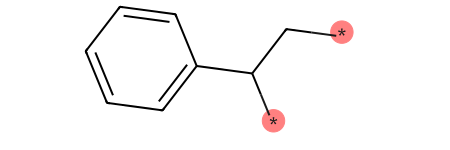

In [2]:
from psmiles import PolymerSmiles as PS

ps = PS("C(c1ccccc1)(C[*])[*]")
ps.canonicalize

In [1]:
%load_ext autoreload
%autoreload 2

PSMILES: [*]CC(c1ccccc1)[*]


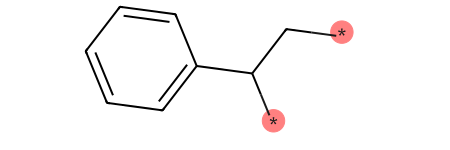

In [1]:
from psmiles import PolymerSmiles as PS
ps = PS('[*]CC(c1ccccc1)[*]' )
ps

In [18]:
# Save the figure to disk. Default name to PSMILES string.
ps.savefig()

PSMILES: [*]CC([*])c1ccccc1


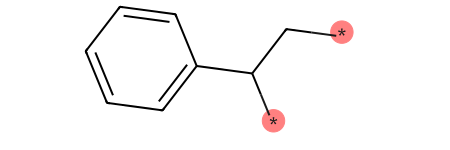

In [3]:
# Canonicalize th PSMILES string.
ps.canonicalize

PSMILES: C(c1ccccc1)(C[*])[*]


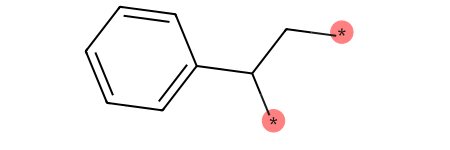

PSMILES: C(C(c1ccccc1)[*])[*]


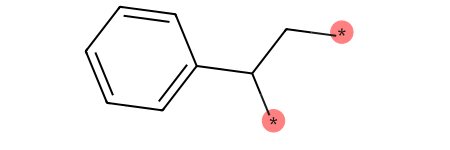

PSMILES: [*]C(C[*])c1ccccc1


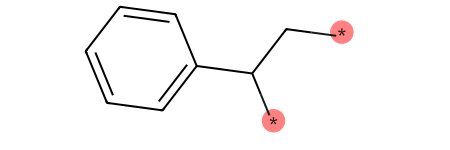

In [4]:
# Randomize the PSMILES string (chemistry is preserved)
_ = [display(ps.randomize) for _ in range(3)]

PSMILES: [*]CC([*])c1ccccc1


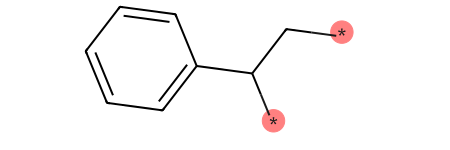

PSMILES: [*]CC([*])c1ccccc1


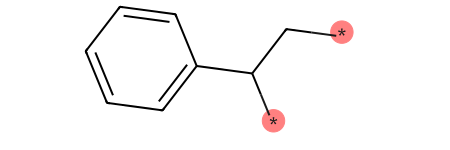

PSMILES: [*]CC([*])c1ccccc1


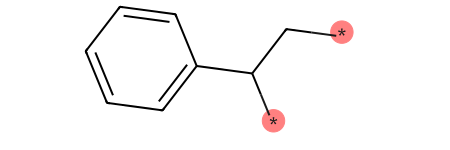

In [5]:
# First randomize then canonicalize the PSMILES strings. The PSMILES strings are the same.
pss = [ps.randomize.canonicalize for _ in range(3)]
[display(_ps) for _ps in pss]
assert len(set([str(_ps) for _ps in pss])) == 1

PSMILES: [*]C(CCC([*])c1ccccc1)c1ccccc1


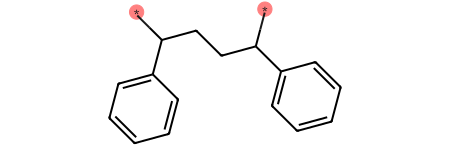

In [6]:
# Get the dimer from the monomer. 
# Connect to first star
ps.dimer(0)

PSMILES: [*]CC(CC([*])c1ccccc1)c1ccccc1


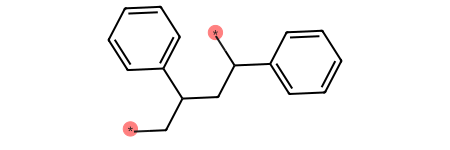

In [7]:
# Connect to second star
ps.dimer(1)

### Fingerprints for PSMILES strings

In [8]:
# CI fingerprint
ps.fingerprint('ci')

array([0, 1, 0, ..., 0, 0, 0])

In [9]:
# Mordred fingerprint
# print only the first 10 fingerprints
{k:v for k,v in [x for x in ps.fingerprint('mordred').items()][:10]}


{'ABC': 6.432910715900229,
 'ABCGG': 4.50402767268591,
 'nAcid': 0,
 'nBase': 0,
 'SpAbs_A': 10.892446562528253,
 'SpMax_A': 0.050820112679968776,
 'SpDiam_A': 0.10164022535993666,
 'SpAD_A': 10.892446562528253,
 'SpMAD_A': 0.03370129909556341,
 'LogEE_A': 0.6054038617594406}

In [10]:
ps.fingerprint('rdkit')

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# polyBERT fingerprint. 
# polyBERT is a chemical language model that has learned to predict PSMILES string fingerprints.
# polyBERT is super fast
ps.fingerprint('polyBERT')

/data/chris/psmiles/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([ 3.50811750e-01,  1.14510253e-01,  3.86458665e-01, -5.47735453e-01,
       -1.64251506e+00, -1.20370276e-01,  1.00393105e+00, -3.96532640e-02,
       -2.62746289e-02,  4.91384774e-01, -3.88579428e-01, -9.19215083e-02,
        6.85911775e-01, -1.63276303e+00, -1.48769546e+00, -8.93422246e-01,
       -9.03815329e-01, -1.25334454e+00, -7.01706529e-01, -4.42330152e-01,
        9.31518793e-01,  6.43251985e-02,  6.18372321e-01,  3.25154901e-01,
       -7.15663731e-01,  8.33098233e-01,  2.78026676e+00,  7.38025233e-02,
       -1.15337002e+00, -8.77115428e-02,  4.78095114e-01, -1.24472153e+00,
        2.36280441e-01, -7.10530102e-01,  1.38347030e+00,  3.42699736e-01,
       -3.61699671e-01,  3.40443514e-02,  1.38261378e-01,  2.92336106e-01,
       -1.81008473e-01,  1.50301248e-01,  6.96576476e-01,  1.06370592e+00,
        6.04684651e-01,  9.43712354e-01,  1.44894123e+00, -1.37666091e-01,
        1.19438040e+00,  1.00399971e-01, -2.21900135e-01,  2.37760633e-01,
       -2.06672475e-01, -

### Canonicalize PSMILES 

set `logging.getLogger().setLevel(logging.DEBUG)` for verbose mode


In [12]:
# add draw options
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices= False
IPythonConsole.drawOptions.minFontSize = 16
IPythonConsole.molSize = (600, 200)   # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG

PSMILES: [*]NC(C)CC([*])=O


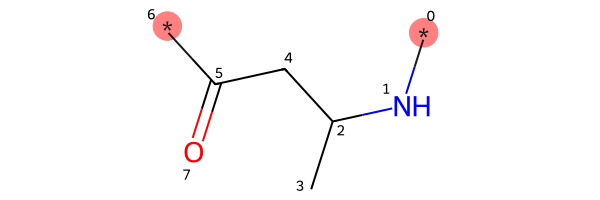

PSMILES: [*]CC(=O)NC([*])C


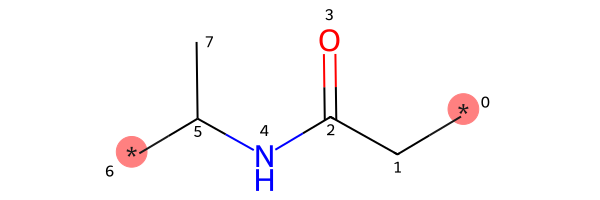

In [13]:
import logging
# The INFO level does not give any additional information
logging.getLogger().setLevel(logging.INFO)
sm = '[*]NC(C)CC([*])=O'
display(PS(sm))
display(PS(sm).canonicalize)

PSMILES: [*]NC(C)CC([*])=O


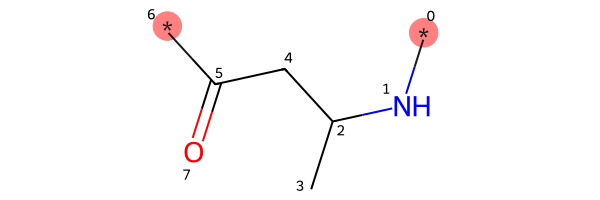

DEBUG:root:(1) Set labels and get connection dict 
 {'atom_rings': (),
 'bond_rings': (),
 'index': [0, 1, 2, 3, 4, 5, 6, 7],
 'neighbor': {'atom_type': [['N'], ['C']],
              'bond_type': [[rdkit.Chem.rdchem.BondType.SINGLE],
                            [rdkit.Chem.rdchem.BondType.SINGLE]],
              'index': [[1], [5]],
              'path': (1, 2, 4, 5)},
 'star': {'atom_type': ['*', '*'], 'bond_type': None, 'index': [0, 6]},
 'stereo': [],
 'symbols': ['*', 'N', 'C', 'C', 'C', 'C', '*', 'O']}


SMILES: *NC(C)CC(*)=O |$;N1;;;;N2;;$,atomProp:0.dummyLabel.*:6.dummyLabel.*|


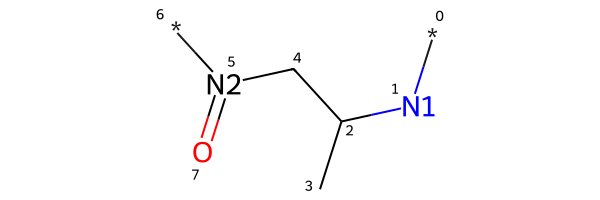

DEBUG:root:(2) Add bond between neighbors [[1], [5]]; bond type SINGLE SINGLE 


SMILES: *N1C(C)CC1(*)=O |$;N1;;;;N2;;$,atomProp:0.dummyLabel.*:6.dummyLabel.*|


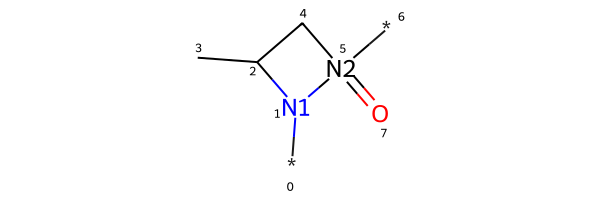

DEBUG:root:(3) Remove stars and bonds


SMILES: CC1CC(=O)N1 |$;;;N2;;N1$|


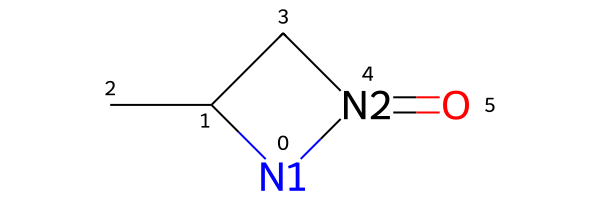

DEBUG:root:(4) Canonicalize


SMILES: CC1CC(=O)N1 |$;;;N2;;N1$|


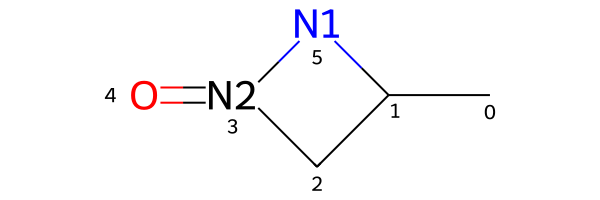

DEBUG:root:Found 1 rings that contain N1 and N2 and have length 4
DEBUG:root:Possible rings to break: [(1, 5, 3, 2)]
DEBUG:root:Searching in ring (sorted index): [1, 2, 3, 5]
DEBUG:root:Index 1 and 2 are in ring and connected with bond 1. Bond 1 is not in other rings. Break.
DEBUG:root:(5) Break bond at atom idx 1 and 2. Bond type was SINGLE


SMILES: CCNC(C)=O |$;;N1;N2;;$|


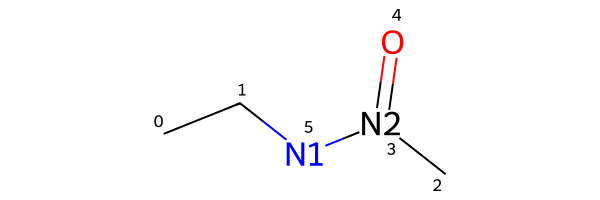

DEBUG:root:(6) Add stars at index 1 and 2 with bond type SINGLE. Renumber atoms.


SMILES: *CC(=O)NC(*)C |atomProp:0.dummyLabel.*:6.dummyLabel.*|


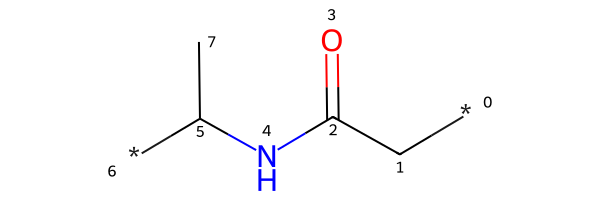

PSMILES: [*]CC(=O)NC([*])C


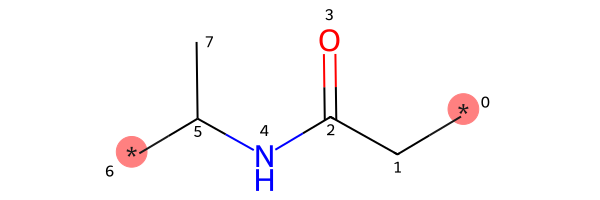

In [14]:
import logging
# The DEBUG level visualizes the canonicalization process  
logging.getLogger().setLevel(logging.DEBUG)
sm = '[*]NC(C)CC([*])=O'
display(PS(sm))
display(PS(sm).canonicalize)

### Inchi string and inchi key of PSMILES string

In [15]:
logging.getLogger().setLevel(logging.INFO)
ps.inchi

[11:29:08] WARNING: Omitted undefined stereo



'InChI=1S/C8H8At2/c9-6-8(10)7-4-2-1-3-5-7/h1-5,8H,6H2'

In [16]:
ps.inchi_key

'PYOVDMHONBXEFX-UHFFFAOYSA-N'

###  Alternating copolymers from two PSMILES strings
The second argument of the function alternating_copolymer specifies which how the *s are connected

PSMILES: [*]CC(C)(CCO[*])C(=O)Oc1cccc(C)c1C


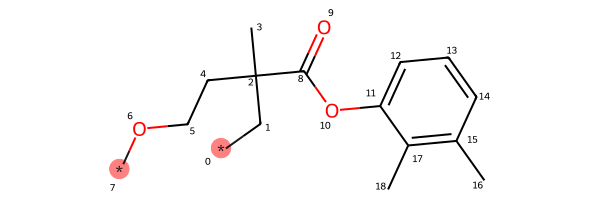

In [17]:
ps1 = PS('C(C([*])(C([*]))C)(=O)OC1=C(C(=CC=C1)C)C')
ps2 = PS('[*]CCO[*]')
ps1.alternating_copolymer(ps2, [0,0])

PSMILES: [*]CCOC(C)(C[*])C(=O)Oc1cccc(C)c1C


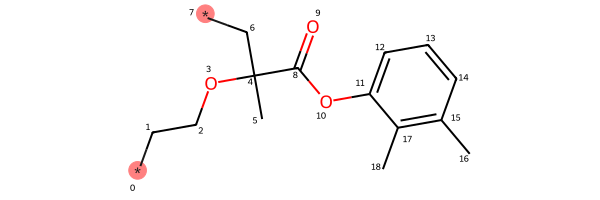

In [18]:
ps1.alternating_copolymer(ps2, [0,1])

PSMILES: [*]OCCCC([*])(C)C(=O)Oc1cccc(C)c1C


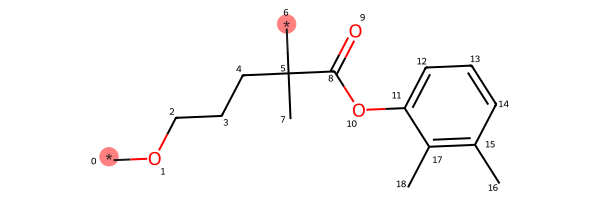

In [19]:
ps1.alternating_copolymer(ps2, [1,0])

PSMILES: [*]CCOCC([*])(C)C(=O)Oc1cccc(C)c1C


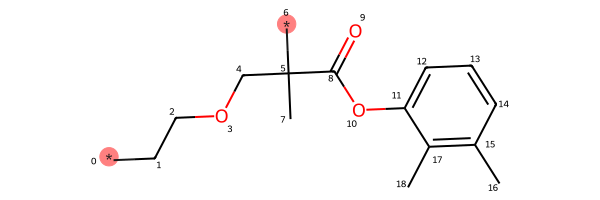

In [20]:
ps1.alternating_copolymer(ps2, [1,1])